<a href="https://colab.research.google.com/github/juhee3199/fake-news-detection/blob/main/tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns



- 0: 진짜뉴스, 1: 가짜 뉴스

In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake news detection/news_train.csv')
train.head()

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0


In [5]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake news detection/news_test.csv')
test.head()

,n_id,date,title,content,ord,id
0,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가',1,NEWS00237_1
1,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",[이데일리 김대웅 기자] 반도체 장비 업체 코세스(089890)의 기술력이 마이크로...,2,NEWS00237_2
2,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",최근 대형 업체들과 거래를 맺고 관련 장비들의 양산에 돌입하면서 주가도 연일 신고가...,3,NEWS00237_3
3,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",TV를 필두로 올해부터 마이크로 LED의 시대가 본격적으로 개화할 것으로 예상되면서...,4,NEWS00237_4
4,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대","코세스는 반도체 장비를 제조, 판매하는 업체로 지난 2006년 11월 코스닥 시장에...",5,NEWS00237_5


In [6]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fake news detection/sample_submission.csv")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118745 entries, 0 to 118744
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   n_id     118745 non-null  object
 1   date     118745 non-null  int64 
 2   title    118745 non-null  object
 3   content  118745 non-null  object
 4   ord      118745 non-null  int64 
 5   info     118745 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.4+ MB


In [8]:
print("진짜 뉴스 개수: {}".format(len(train.loc[train['info']==0])))
print("가짜 뉴스 개수: {}".format(len(train.loc[train['info']==1])))

진짜 뉴스 개수: 71813
가짜 뉴스 개수: 46932


**뉴스 헤드라인 확인하기**

In [9]:
train['content'].head()

0    [이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도
1         "실적기반" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개
2             하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시
3              종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지
4                          전국적인 소비 붐 조성에 기여할 예정
Name: content, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


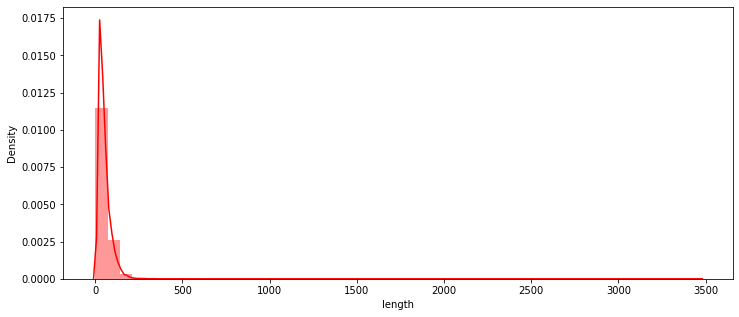

In [10]:
# 뉴스 헤드라인 길이

train['length'] = train['content'].apply(lambda x: len(x))
plt.figure(figsize=(12,5))
sns.distplot(train['length'],color='r')

대부분 뉴스 헤드라인의 길이는 0~250자에 분포되어 있다

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


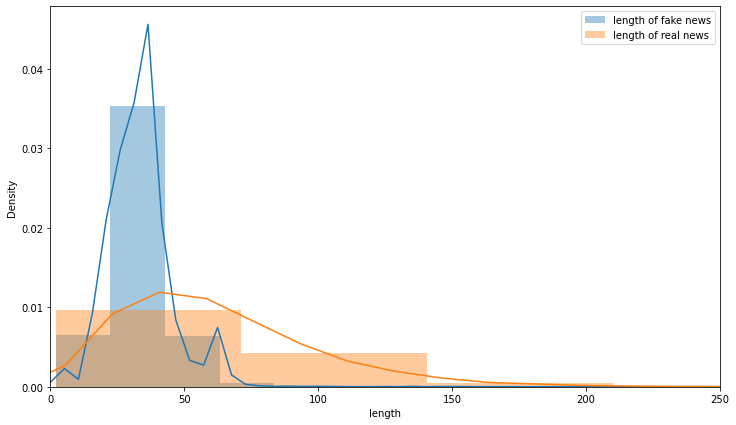

In [11]:
plt.figure(figsize=(12,7))
fake = train.loc[train['info']==1]
real = train.loc[train['info']==0]
sns.distplot(fake['length'],label = 'length of fake news')
sns.distplot(real['length'],label = 'length of real news')
plt.xlim(0,250)
plt.legend()

진짜, 가짜 뉴스 텍스트의 길이 분포도를 보면 가짜 뉴스는 0-50자 사이에 치우쳐있는 반면, 진짜뉴스는 0-150에 골고루 분포되어있다

가짜 뉴스는 짧은 스팸성 내용이들어있다고 추측할 수 있다

In [12]:
fake['length'].describe()

count    46932.000000
mean        34.470702
std         20.383651
min          2.000000
25%         27.000000
50%         34.000000
75%         39.000000
max       1022.000000
Name: length, dtype: float64

In [13]:
real['length'].describe()

count    71813.000000
mean        62.342891
std         43.596060
min          2.000000
25%         34.000000
50%         55.000000
75%         82.000000
max       3469.000000
Name: length, dtype: float64

In [14]:
# ord 의 가짜진짜 뉴스 분포 정도
# 가짜 뉴스에 대한 wordcloud 에 따라 해당 top 단어 들이 있는 컬럼을 fake뉴스로 예측.

AutoML 
https://dacon.io/competitions/official/235658/codeshare/1843?page=1&dtype=recent&ptype=pub
PB 0.94

자연어 처리 과정
1. Preprocessing
: 불용어 제거(Stopwords removing), 형태소 분석(Stemming), 표제어 추출(Lemmatization)


2. Vectorization
: One-hot Encoding, Count vectorization, Tfidf, Padding


3. Embedding
: Word2vec, Doc2vec, Glove, Fasttext


4. Modeling
: GRU, LSTM, Attention


위의 과정을 이번 신문기사 분류 문제에 적용해보면 다음과 같습니다.

1. 우선 데이터를 불러온 후 기사의 각 문장별로 Konlpy의 함수 중 하나를 활용하여 형태소 분석을 진행합니다.
2. 그 후 필요없는 단어들을 불용어로 지정하고 제외합니다.
3. 해당 결과를 sklearn 패키지의 함수 중 하나를 이용하여 정수 인코딩으로 변환해주는 Vectorization을 진행합니다.
4. 각 문장별로 벡터화된 문장들은 서로 다른 길이를 갖게 됩니다. 모델에 입력하기 위해 모든 문장 벡터들은 일정한 길이를 가져야 하므로 길이가 긴 문장을 자르고 길이가 짧은 문장은 0으로 채워넣습니다.(Padding)
5. 앞서 처리된 문장 벡터들을 특정 차원으로 임베딩 시킵니다. 딥러닝 모델을 이용할 시 자동으로 임베딩을 진행해주는 층을 추가하면 간단하게 진행이 됩니다. 성능을 높이기 위해서 pre-trained embedding인 word2vec, glove 등을 이용합니다.
6. 훈련을 시키고 테스트를 진행합니다.

### 1. Preprocessing -  형태소 분석, 불용어 제거

In [15]:
# konlpy Mecab 사용하기

!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
     |████████████████████████████████| 460kB 43.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb

In [16]:
from konlpy.tag import Mecab
import re

def text_preprocessing(text_list):
  stopwords = ['을', '를', '이', '가', '은','는','null'] #불용어 설정
  tokenizer = Mecab()
  token_list = []

  for text in text_list:
    txt = re.sub('[^가-힣a-z]', ' ', text.lower()) #한글, 소문자 남기고 나머지 모두 제거
    token = tokenizer.morphs(txt)
    token = [t for t in token if t not in stopwords or type(t) != float] #형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
    token_list.append(token)

  return token_list, tokenizer

train['token'], mecab = text_preprocessing(train['content'])
train['token']

0                [이, 데일리, marketpoint, 현재, 코스닥, 기관, 억, 순매도]
1         [실적, 기반, 저가, 에, 매집, 해야, 할, 월, 급등, 유망주, top, 전격...
2               [하이스, 탁론, 선취, 수수료, 없, 는, 월, 최저, 금리, 상품, 출시]
3            [종합, 경제, 정보, 미디어, 이, 데, 일리, 무단, 전재, 재, 배포, 금지]
4                       [전국, 적, 인, 소비, 붐, 조성, 에, 기여, 할, 예정]
                                ...                        
118740    [미, fda, 임상, 상, 허가, 임박, 묻, 고, 따, 블, 로, 갈, 바이오,...
118741                    [똑똑, 해진, 소비자, 한국, 도, 이젠, 소형차, 시대]
118742                    [똑똑, 해진, 소비자, 한국, 도, 이젠, 소형차, 시대]
118743                      [년, 한국, tv, 대중, 대, 인터넷, 연결, 된다]
118744                      [년, 한국, tv, 대중, 대, 인터넷, 연결, 된다]
Name: token, Length: 118745, dtype: object

### 2. Vectorization 

: NLP를 컴퓨터가 이해할 수 있게 수치로 바꾸는 것
- Count vectorization, TfIdf, Padding


이번 대회에서는 특별한 vectorization 기법을 사용하지 않고 keras의 texts_to_sequences를 통한 정수화만 진행해 주어도 높은 정확도를 얻을 수 있다.

https://dacon.io/competitions/official/235658/codeshare/1839?page=1&dtype=recent&ptype=pub

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text2sequence(train_text, max_len=100):
    
    tokenizer = Tokenizer() #keras의 vectorizing 함수 호출
    tokenizer.fit_on_texts(train_text) #train 문장에 fit
    train_X_seq = tokenizer.texts_to_sequences(train_text) #각 토큰들에 정수 부여
    vocab_size = len(tokenizer.word_index) + 1 #모델에 알려줄 vocabulary의 크기 계산
    print('vocab_size : ', vocab_size)
    X_train = pad_sequences(train_X_seq, maxlen = max_len) #설정한 문장의 최대 길이만큼 padding
    
    return X_train, vocab_size, tokenizer


train_y = train['info']
train_X, vocab_size, vectorizer = text2sequence(train['token'], max_len = 100)
print(train_X.shape, train_y.shape)

vocab_size :  37238
(118745, 100) (118745,)


In [18]:
train_X

array([[  0,   0,   0, ..., 230,  51, 880],
       [  0,   0,   0, ...,  83, 570,  45],
       [  0,   0,   0, ...,  69, 287, 322],
       ...,
       [  0,   0,   0, ..., 162, 171, 134],
       [  0,   0,   0, ..., 137, 130,  60],
       [  0,   0,   0, ..., 137, 130,  60]], dtype=int32)

위에 정수화 말고 tfidf 사용해서 모델돌려보고 결과 비교해보기

## 3. Embedding
: Embedding을 통해 의미가 유사한 토큰들은 가깝게 임의의 차원에 뿌리자.
- 벡터화 방법들은 단어의 중요도나 문서 안에서의 중요도는 구분 할 수 있지만 단어 사이의 유사도는 구별할 수 없음.
- 비슷한 의미를 내포하고 있는 토큰들은 서로 가깝게, 그렇지 않은 토큰들은 서로 멀리 뿌리도록 하는 것이 임베딩의 목적


**`Embedding()에 넣어야하는 대표적인 인자`**

- 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
- 두번째 인자 = 임베딩 벡터의 출력 차원. 임베딩한 후 벡터의 크기
- input_length = 입력 시퀀스의 길이

#### word2vec
: 주변 단어와의 관계를 통해 해당 단어의 의미적 특성을 파악
- 단점: 사용자가 지정한 주변 단어의 개수에 대해서만 학습이 이루어지기 때문에 데이터 전체에 대한 정보를 담기 어렵다.
- 구글의 사전 훈련된 word2vec bin 파일을 다운로드 https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [19]:
# gensim 모듈과 bin파일을 활용해 word2vec 모델을 로드
# 구글마운트

import gensim
word2vec = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.bin.gz', binary = True)

word2vec에서 필요 단어만 추출

In [20]:
# vectorizer.word_index.items() # = vocabulary 

In [25]:
# vocab_size = len(tokenizer.index_word) + 1
embedding_matrix = np.zeros((vocab_size, 300)) # 300차원의 임베딩 매트릭스 생성

# tokenizer에 있는 단어사전을 순회하면서 word2vec의 300차원 vector를 가져온다.
count = 0

for word, idx in vectorizer.word_index.items():
    if word in word2vec:                    # 넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련된 토큰이라는 의미.)
      embedding_vector = word2vec[word]   # 해당 토큰에 해당하는 vector를 불러오고
      embedding_matrix[idx] = embedding_vector # 해당 위치의 embedding_matrix에 저장
   
    else:
      print(word, "word2vec에 없는 단어입니다.")
      count += 1
    pass
        
embedding_matrix.shape

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
소고 word2vec에 없는 단어입니다.
멸할 word2vec에 없는 단어입니다.
팻말 word2vec에 없는 단어입니다.
붙여졌 word2vec에 없는 단어입니다.
탐탁 word2vec에 없는 단어입니다.
부주석 word2vec에 없는 단어입니다.
끌려가 word2vec에 없는 단어입니다.
웨이베이 word2vec에 없는 단어입니다.
최루 word2vec에 없는 단어입니다.
물대포 word2vec에 없는 단어입니다.
침사 word2vec에 없는 단어입니다.
언쟁 word2vec에 없는 단어입니다.
개막식 word2vec에 없는 단어입니다.
모독 word2vec에 없는 단어입니다.
가두서명 word2vec에 없는 단어입니다.
은메달 word2vec에 없는 단어입니다.
김옥찬 word2vec에 없는 단어입니다.
입행 word2vec에 없는 단어입니다.
박춘엽 word2vec에 없는 단어입니다.
떨어진다고 word2vec에 없는 단어입니다.
발라서 word2vec에 없는 단어입니다.
메뉴인 word2vec에 없는 단어입니다.
앤토니 word2vec에 없는 단어입니다.
마티네즈 word2vec에 없는 단어입니다.
유유 word2vec에 없는 단어입니다.
산추 word2vec에 없는 단어입니다.
출장비 word2vec에 없는 단어입니다.
초간 word2vec에 없는 단어입니다.
은병 word2vec에 없는 단어입니다.
헝겊 word2vec에 없는 단어입니다.
이소프로필알코올 word2vec에 없는 단어입니다.
손깍지 word2vec에 없는 단어입니다.
엄지손가락 word2vec에 없는 단어입니다.
물기 word2vec에 없는 단어입니다.
타월 word2vec에 없는 단어입니다.
만진다 word2vec에 없는 단어입니다.
발톱 word2vec에 없는 단어입니다.
노다지 word2vec에 없는 단어입니다.
천왕봉 word2vec에 없는 단어입니다.
법계 word2vec에 없는 단어입니다.
이륙 word2ve

(37238, 300)

### 4. modeling

keras embedding layer에 embedding_matrix를 가중치로 주어 이용

In [32]:
tf.random.set_seed(42)

from sklearn.model_selection import train_test_split

# X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, random_state = 42, test_size = 0.3)

##### validation o

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

from tensorflow import keras
checkpoint_cb = keras.callbacks.ModelCheckpoint("juhee_best_model.h5",
                                               save_best_only = True)

history = model.fit(X_train, y_train,
                 epochs=10,
                 batch_size = 100, 
                 validation_data = (X_valid, y_valid), 
                 validation_batch_size = 100,
                 callbacks = [checkpoint_cb])



### 수정해보기

- dropout 을 0.5
- LSTM 출력 노드를 32로.

In [48]:
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Activation, Embedding, SpatialDropout1D, Dropout
from keras.layers import LSTM
import tensorflow as tf

max_len=1000
# vocab_size = 37238

tf.random.set_seed(42)

model = Sequential()
model.add(Embedding(vocab_size, 300,weights = [embedding_matrix], input_length = max_len)) #임베딩 가중치 적용 코드
model.add(SpatialDropout1D(0.3))
model.add(LSTM(64))  
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 300)         11171400  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 1000, 300)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 11,269,065
Trainable params: 11,269,065
Non-trainable params: 0
__________________________________________

In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

from tensorflow import keras
checkpoint_cb = keras.callbacks.ModelCheckpoint("juhee_best_model.h5",
                                               save_best_only = True)

history = model.fit(train_X, train_y,
                 epochs=10,
                 batch_size = 100,
                 callbacks = [checkpoint_cb])


Epoch 1/10
1188/1188 [==============================] - 411s 346ms/step - loss: 0.0789 - accuracy: 0.9747
Epoch 2/10
1188/1188 [==============================] - 407s 343ms/step - loss: 0.0262 - accuracy: 0.9923
Epoch 3/10
1188/1188 [==============================] - 406s 342ms/step - loss: 0.0132 - accuracy: 0.9964
Epoch 4/10
1188/1188 [==============================] - 408s 344ms/step - loss: 0.0081 - accuracy: 0.9977
Epoch 5/10
1188/1188 [==============================] - 407s 343ms/step - loss: 0.0055 - accuracy: 0.9986
Epoch 6/10
1188/1188 [==============================] - 410s 345ms/step - loss: 0.0047 - accuracy: 0.9988
Epoch 7/10
1188/1188 [==============================] - 418s 352ms/step - loss: 0.0039 - accuracy: 0.9989
Epoch 8/10
1188/1188 [==============================] - 412s 347ms/step - loss: 0.0032 - accuracy: 0.9992
Epoch 9/10
1188/1188 [==============================] - 409s 344ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 10/10
1188/1188 [=======================

In [54]:
# 모델과 가중치 저장

model.save('tutorial3 model-all')

INFO:tensorflow:Assets written to: tutorial3 model-all/assets


In [55]:
# 모델을 JSON 파일 형식으로 만들어 저장하기
model_json = model.to_json()
with open("tutorial3-all.json", "w") as json_file : 
    json_file.write(model_json)


# 가중치를 h5파일 포맷으로 만들어 저장하기 
model.save_weights("tutorial3-all.h5")


In [56]:
model.save_weights("tutorial-3.h5")

#### 모델 평가 VALIDATE

In [39]:
loss_and_metrics = model.evaluate(X_valid, y_valid,batch_size = 100)
print('loss_and_metrics : ' + str(loss_and_metrics))

model.predict(X_valid)

357/357 [==============================] - 25s 71ms/step - loss: 0.0868 - accuracy: 0.9846
loss_and_metrics : [0.08683962374925613, 0.9846171140670776]


array([[5.5243281e-06],
       [5.0691956e-06],
       [5.1965790e-06],
       ...,
       [6.9557282e-06],
       [9.9999905e-01],
       [9.7823656e-01]], dtype=float32)

### test 데이터 가공

In [57]:
# test = pd.read_csv('data/news_test.csv')
test.head()

,n_id,date,title,content,ord,id,token
0,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가',1,NEWS00237_1,"[마이크, 로, led, tv, 장비, 양산, 돌입, 전방, 업체, 투자, 확대, ..."
1,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",[이데일리 김대웅 기자] 반도체 장비 업체 코세스(089890)의 기술력이 마이크로...,2,NEWS00237_2,"[이, 데일리, 김대웅, 기자, 반도체, 장비, 업체, 코, 세스, 의, 기술력, ..."
2,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",최근 대형 업체들과 거래를 맺고 관련 장비들의 양산에 돌입하면서 주가도 연일 신고가...,3,NEWS00237_3,"[최근, 대형, 업체, 들, 과, 거래, 를, 맺, 고, 관련, 장비, 들, 의, ..."
3,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",TV를 필두로 올해부터 마이크로 LED의 시대가 본격적으로 개화할 것으로 예상되면서...,4,NEWS00237_4,"[tv, 를, 필두, 로, 올해, 부터, 마이크, 로, led, 의, 시대, 가, ..."
4,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대","코세스는 반도체 장비를 제조, 판매하는 업체로 지난 2006년 11월 코스닥 시장에...",5,NEWS00237_5,"[코, 세스, 는, 반도체, 장비, 를, 제조, 판매, 하, 는, 업체, 로, 지난..."


In [58]:
test.shape

(142565, 7)

In [59]:
# 1. preprocessing

test['token'], mecab = text_preprocessing(test['content'])
test['token']

0         [마이크, 로, led, tv, 장비, 양산, 돌입, 전방, 업체, 투자, 확대, ...
1         [이, 데일리, 김대웅, 기자, 반도체, 장비, 업체, 코, 세스, 의, 기술력, ...
2         [최근, 대형, 업체, 들, 과, 거래, 를, 맺, 고, 관련, 장비, 들, 의, ...
3         [tv, 를, 필두, 로, 올해, 부터, 마이크, 로, led, 의, 시대, 가, ...
4         [코, 세스, 는, 반도체, 장비, 를, 제조, 판매, 하, 는, 업체, 로, 지난...
                                ...                        
142560         [주식, 시장, 의, 역사, 를, 다시, 쓸, 역대, 급, 종목, 목표, 이상]
142561                    [똑똑, 해진, 소비자, 한국, 도, 이젠, 소형차, 시대]
142562                    [똑똑, 해진, 소비자, 한국, 도, 이젠, 소형차, 시대]
142563                      [년, 한국, tv, 대중, 대, 인터넷, 연결, 된다]
142564                      [년, 한국, tv, 대중, 대, 인터넷, 연결, 된다]
Name: token, Length: 142565, dtype: object

In [60]:
# 2. 벡터화
max_len=100

test_X_seq = vectorizer.texts_to_sequences(test['token']) #각 토큰들에 정수 부여
vocab_size = len(vectorizer.word_index) + 1 #모델에 알려줄 vocabulary의 크기 계산
print('vocab_size: ', vocab_size)
X_test = pad_sequences(test_X_seq, maxlen = max_len) #설정한 문장의 최대 길이만큼 padding
    
    
print(X_test.shape)


vocab_size:  37238
(142565, 100)


In [61]:

# model.load_weights("tutorial-3.h5")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
result = model.predict(X_test)
result

array([[0.999488  ],
       [0.00290069],
       [0.8507262 ],
       ...,
       [0.999993  ],
       [0.9999799 ],
       [0.9999799 ]], dtype=float32)

In [62]:
result.shape

(142565, 1)

### submit

In [63]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fake news detection/sample_submission.csv")
submission.head()

,id,info
0,NEWS00237_1,0
1,NEWS00237_2,0
2,NEWS00237_3,0
3,NEWS00237_4,0
4,NEWS00237_5,0


In [64]:
submission.shape

(142565, 2)

In [66]:


submission.loc[:,'info'] = np.where(result> 0.5, 1,0).reshape(-1)

submission.loc[:,["id","info"]].to_csv("submission-juhee1.csv", index = False)
submission

,id,info
0,NEWS00237_1,1
1,NEWS00237_2,0
2,NEWS00237_3,1
3,NEWS00237_4,0
4,NEWS00237_5,0
...,...,...
142560,NEWS09482_72,1
142561,NEWS09482_73,1
142562,NEWS09482_74,1
142563,NEWS09482_75,1


##  베이스라인


- Train 데이터에서 라벨링된 광고 정보가 Test 데이터에 나오는 여부에 따라 1, 0 으로 예측
- Rule-Based 알고리즘을 활용

https://dacon.io/competitions/official/235658/codeshare/1844?page=1&dtype=recent&ptype=pub

In [ ]:
train_unique_ad_sentence = train.query('info == "1"')['content'].unique()
test_unique_sentence = test['content'].unique()

print(len(train_unique_ad_sentence))
print(len(test_unique_sentence))
print(len(set(train_unique_ad_sentence) & set(test_unique_sentence)))

# Test 데이터에 있는 65,827개의 고유 content 중 1,973개가 Train 데이터에서 나온 광고성 문구와 같다

In [ ]:
#  Train 데이터의 광고성 문구와 같으면 1, 아니면 0으로 예측하는 Rule-Based 알고리즘을 구축


from tqdm import tqdm

test_content = test['content'].values

for idx, sent in enumerate(tqdm(test_content)) : #Test 데이터에 있는 모든 content들에 대하여

    if sent in train_unique_ad_sentence: # Train 데이터의 광고성 문구와 같은지 비교
        submission['info'].iloc[idx] = 1 # 같으면 1

    else : 
        submission['info'].iloc[idx] = 0 # 다르면 0

print(submission.head())

In [ ]:
submission.to_csv('simple_baseline.csv', index = False)

In [ ]:
데이터 개수

count.mean()
